In [1]:
import control
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    'figure.figsize': (4,4)
})

In [40]:
def nyquist_plot( H, ax = plt ,freq_lim=np.pi, max_value = np.inf):
    w = np.linspace( 0, freq_lim, 2000 )
    z = np.exp( 1j*w )
    
    thetas =  np.angle( H(z) )
    mods = np.abs( H(z) )
    x = mods * np.cos( thetas )
    y = mods * np.sin( thetas )
    
    lim_value = max(np.append( mods, 1 )) * 1.5
    lim_value = lim_value if lim_value < max_value else max_value
    
    ax.plot( x, y, label='Nyquist' )
    ax.plot( np.cos( 2*w ), np.sin(2*w), 'k-.' )
    ax.scatter( [-1],[0],s = 100, c='r', marker='x' )
    ax.scatter( x[0], y[0], label='$\omega=0r/s$', marker=(3, 0, 45), s=100 )
    ax.scatter( x[-1], y[-1], label='$\omega=\pi r/s$' )
    
    ax.grid()
    ax.set_xlim( [-lim_value, lim_value] )
    ax.set_ylim( [-lim_value, lim_value] )    
    ax.legend()
    
    
    ax.set_xlabel( 'Re{z}' )
    ax.set_ylabel( 'Im{z}' )
    
    
def save_path( name_fig ):
    return f'../Img/{name_fig}.png'

In [41]:
z = control.TransferFunction.z
H = lambda z: K / ( z - 1/2 )

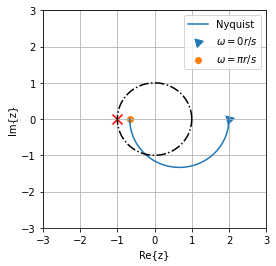

In [42]:
K = 1
fig = plt.figure()
ax = fig.gca()
nyquist_plot(H, ax)
plt.savefig( save_path('7') )

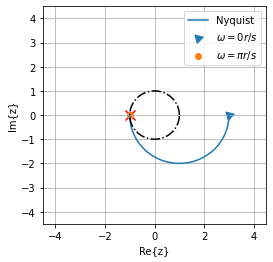

In [43]:
K = 3/2
fig = plt.figure()
ax = fig.gca()
nyquist_plot(H, ax)
plt.savefig( save_path('7-1') )

In [44]:
H = lambda z: K * ( z - 2 ) / ( z + 2 )

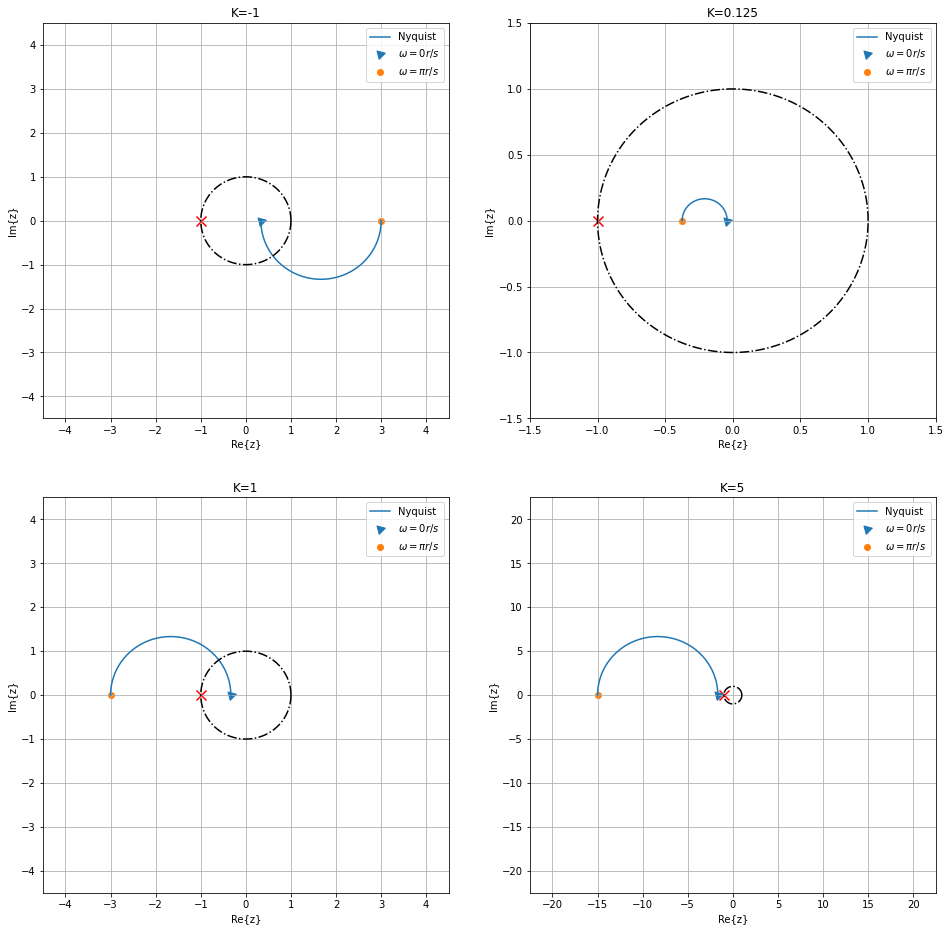

In [45]:
Ks = [-1, 1/8, 1, 5]
fig, axs = plt.subplots( 2, 2, figsize=( 8*2, 8*2 ) )
axs = axs.reshape( (4) )
for K, ax in zip( Ks, axs):
    ax.set_title( f'K={K}' )
    nyquist_plot( H, ax )
plt.savefig( save_path( f'8-a' ) )

In [24]:
H = lambda z: ( z - 2 ) / ( z + 2 )
w = np.linspace( 0, 2*np.pi, 2000 )

In [25]:
z = np.exp( 1j*w )

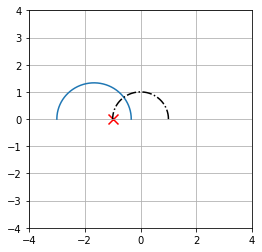

In [230]:
nyquist_plot( H, np.pi )

In [46]:
H = lambda z: K / ( ( z - 2 ) * ( z + 3 ) )
poles = lambda K: np.roots( [1 ,1, K -6] )

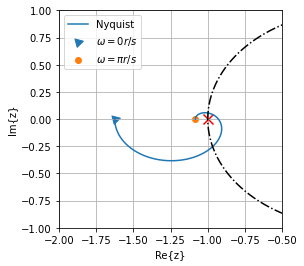

In [47]:
fig = plt.figure()
ax = fig.gca()
K = 6.5
nyquist_plot( H, ax )
ax.set_xlim( [ -2, -0.5 ] )
ax.set_ylim( [ -1, 1 ] )
plt.savefig( save_path( '8-b-nyquist' ) )

In [49]:
H = lambda z: 4 * K/ ( z ** 2 + 2* z - 1 )

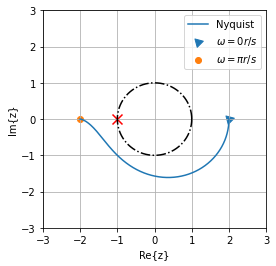

In [50]:
K = 1
fig = plt.figure()
ax = fig.gca()
nyquist_plot( H, ax )
plt.savefig( save_path( '8-c-nyquist' ) )

## Ejercicio 9

In [51]:
H = lambda z: K / ( z * ( z - 1/2 ) )

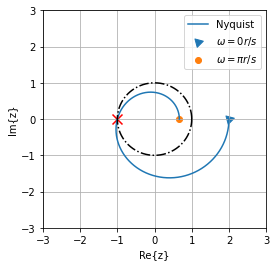

In [52]:
K = 1
fig = plt.figure()
ax = fig.gca()
nyquist_plot( H, ax )
plt.savefig( save_path( '9-a' ) )

In [53]:
H = lambda z: K / ( ( z - 1 ) * ( z - 1/2 ) )

<ipython-input-53-e24962948fcc>:1: RuntimeWarning: divide by zero encountered in true_divide
  H = lambda z: K / ( ( z - 1 ) * ( z - 1/2 ) )
<ipython-input-53-e24962948fcc>:1: RuntimeWarning: invalid value encountered in true_divide
  H = lambda z: K / ( ( z - 1 ) * ( z - 1/2 ) )


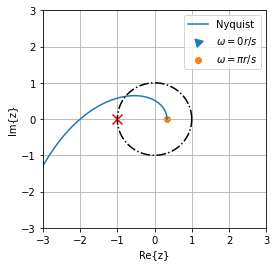

In [63]:
K = 1
fig = plt.figure()
ax = fig.gca()
nyquist_plot( H, ax,max_value=3 )
plt.savefig( save_path( '9-b-nyquist' ) )

In [215]:
p = lambda K: np.array( [ 1, 1, K - 6 ] )

In [216]:
Ks = np.linspace( 0, 100, 2000 )
roots = []
for K in Ks:
    roots.append( np.roots( p(K) ) )
roots = np.array( roots ).reshape( -1 )
X = [ x.real for x in roots ]
Y = [ x.imag for x in roots ]
w = np.linspace( 0, 2*np.pi, 2000 )

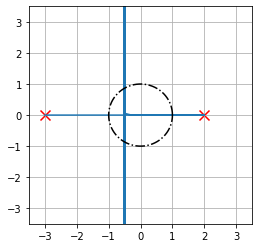

In [217]:
plt.plot( X, Y )
plt.plot( np.cos(w), np.sin( w ), 'k-.' )
plt.scatter( [ -3, 2 ], [0,0], s=100, c='r', marker='x' )
plt.grid()
plt.xlim( [-3.5, 3.5] )
plt.ylim( [-3.5, 3.5] )
plt.savefig( save_path( '8-b-rlocus' ) )

In [168]:
np.roots( [ 1, -10, 24 ] )

array([6., 4.])

In [195]:
np.abs( np.roots( p(6.5) ) )

array([0.70710678, 0.70710678])

In [196]:
np.roots( [1, 2, -1] )

array([-2.41421356,  0.41421356])

In [225]:
np.roots( [ 1, -1, 1/4 + 9/4 ] )

array([0.5+1.5j, 0.5-1.5j])

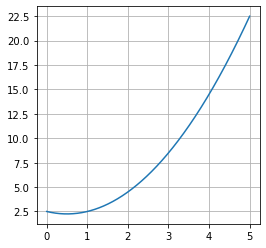

In [228]:
x = np.linspace( 0, 5, 2000 )
p = lambda x: x ** 2 - x + 10/4 
plt.plot(x, p(x))
plt.grid()